In [29]:
from queue import Queue

# List of all recyclable classes in ILSVRC

## All classes in ImageNet

In [30]:
words_filepath = '../resources/words.txt'
wnid_to_name = {}
with open(words_filepath, 'rt') as f:
    for line in f:
        if len(line) > 1:
            wnid, name = line.split('\t')
            wnid_to_name[wnid] = name.strip()

In [31]:
go_to_root("n03216710", {})

Dixie cup, paper cup =>
cup =>
crockery, dishware =>
tableware =>
ware =>
article =>
artifact, artefact =>
whole, unit =>
object, physical object =>
physical entity =>
entity =>


{'n00001740': 'entity',
 'n00001930': 'physical entity',
 'n00002684': 'object, physical object',
 'n00003553': 'whole, unit',
 'n00021939': 'artifact, artefact',
 'n00022903': 'article',
 'n03133538': 'crockery, dishware',
 'n03147509': 'cup',
 'n03216710': 'Dixie cup, paper cup',
 'n04381994': 'tableware',
 'n04550840': 'ware'}

In [32]:
len(wnid_to_name)

82115

In [33]:
wnid_to_name["n05469664"]

'proprioceptor'

In [34]:
name_to_wnid = {v: k for k, v in wnid_to_name.items()}

## Parent-child relationship

In [35]:
is_a_filepath = '../resources/wordnet.is_a.txt'
is_a = {}
with open(is_a_filepath, "rt") as f:
    for line in f:
        if len(line) > 1:
            parent_wnid, child_wnid = line.strip().split(" ")
            if parent_wnid not in is_a:
                is_a[parent_wnid] = []
            is_a[parent_wnid].append(child_wnid)

In [36]:
child_of = {child_wnid: parent_wnid for parent_wnid in is_a 
            for child_wnid in is_a[parent_wnid]}

In [37]:
def reachable_from_wnid(wnid, done, parent=None):
    done[wnid] = parent
    for child_wnid in is_a.get(wnid, []):
        if child_wnid not in done:
            reachable_from_wnid(child_wnid, done, wnid)
    return done

In [38]:
def go_to_root(wnid, done):
    done[wnid] = wnid_to_name[wnid]
    print(wnid_to_name[wnid], "=>")
    if wnid in child_of:
        return go_to_root(child_of[wnid], done)
    return done

In [39]:
go_to_root("n01317541", {})

domestic animal, domesticated animal =>
animal, animate being, beast, brute, creature, fauna =>
organism, being =>
living thing, animate thing =>
whole, unit =>
object, physical object =>
physical entity =>
entity =>


{'n00001740': 'entity',
 'n00001930': 'physical entity',
 'n00002684': 'object, physical object',
 'n00003553': 'whole, unit',
 'n00004258': 'living thing, animate thing',
 'n00004475': 'organism, being',
 'n00015388': 'animal, animate being, beast, brute, creature, fauna',
 'n01317541': 'domestic animal, domesticated animal'}

In [40]:
reachable_wnids = reachable_from_wnid("n01317541", {})

In [41]:
len(reachable_wnids)

214

In [42]:
[wnid_to_name[wnid] for wnid in reachable_wnids]

['domestic animal, domesticated animal',
 'domestic cat, house cat, Felis domesticus, Felis catus',
 'Egyptian cat',
 'Persian cat',
 'kitty, kitty-cat, puss, pussy, pussycat',
 'tiger cat',
 'Angora, Angora cat',
 'tom, tomcat',
 'gib',
 'Siamese cat, Siamese',
 'blue point Siamese',
 'Manx, Manx cat',
 'Maltese, Maltese cat',
 'tabby, queen',
 'Burmese cat',
 'alley cat',
 'Abyssinian, Abyssinian cat',
 'tabby, tabby cat',
 'tortoiseshell, tortoiseshell-cat, calico cat',
 'mouser',
 'dog, domestic dog, Canis familiaris',
 'pooch, doggie, doggy, barker, bow-wow',
 'hunting dog',
 'sporting dog, gun dog',
 'pointer, Spanish pointer',
 'vizsla, Hungarian pointer',
 'German short-haired pointer',
 'setter',
 'English setter',
 'Gordon setter',
 'Irish setter, red setter',
 'bird dog',
 'spaniel',
 'field spaniel',
 'water spaniel',
 'Irish water spaniel',
 'American water spaniel',
 'springer spaniel, springer',
 'English springer, English springer spaniel',
 'Welsh springer spaniel',
 '

## All classes in ILSVRC

In [43]:
from lxml import html
import urllib.request

In [44]:
# https://stackoverflow.com/questions/45826417/imagenet-index-to-wordnet-3-0-synsets
url_synsets = "http://image-net.org/challenges/LSVRC/2016/browse-synsets"

local_filename, headers = urllib.request.urlretrieve(url_synsets)
with open(local_filename) as f:
    data = f.read()

elements = html.fromstring(data).xpath('//a')

In [45]:
synset_to_label = {}
for element in elements:
    href = element.attrib['href']
    if href.startswith('http://imagenet.stanford.edu/synset?wnid='):
        synset_to_label[href[41:]] = element.text
    else:
        print(href)

http://image-net.org
https://vision.cs.unc.edu/


In [46]:
len(synset_to_label)

1000

In [150]:
synset_to_label

{'n02119789': 'kit fox, Vulpes macrotis',
 'n02100735': 'English setter',
 'n02096294': 'Australian terrier',
 'n02066245': 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus',
 'n02509815': 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
 'n02124075': 'Egyptian cat',
 'n02417914': 'ibex, Capra ibex',
 'n02123394': 'Persian cat',
 'n02125311': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
 'n02423022': 'gazelle',
 'n02346627': 'porcupine, hedgehog',
 'n02077923': 'sea lion',
 'n02447366': 'badger',
 'n02109047': 'Great Dane',
 'n02092002': 'Scottish deerhound, deerhound',
 'n02071294': 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca',
 'n02442845': 'mink',
 'n02504458': 'African elephant, Loxodonta africana',
 'n02114712': 'red wolf, maned wolf, Canis rufus, Canis niger',
 'n02128925': 'jaguar, panther, Panthera onca, Felis onca',
 'n02117135': 'hyena, hyaena',
 'n02493509': 'titi, titi monk

## Redundant classes in ILSVRC

In [47]:
def all_classes_in_ilsvrc(main_wnid):
    reachable_ids = reachable_from_wnid(main_wnid, {})
    class_ids = []
    for wnid in synset_to_label:
        if wnid in reachable_ids:
            class_ids.append(wnid)
            print(wnid, synset_to_label[wnid])
    return class_ids

In [76]:
# Classes that we won't ever see
redundant_wnids = ["n00015388", "n00007846", "n09287968", "n00017222", "n04576211", 
                   "n04341686", "n03100490"]
for wnid in redundant_wnids:
    print(wnid, wnid_to_name[wnid])

n00015388 animal, animate being, beast, brute, creature, fauna
n00007846 person, individual, someone, somebody, mortal, soul
n09287968 geological formation, formation
n00017222 plant, flora, plant life
n04576211 wheeled vehicle
n04341686 structure, construction
n03100490 conveyance, transport


In [77]:
redundant_ids = []
for wnid in redundant_wnids:
    redundant_ids += all_classes_in_ilsvrc(wnid)

n02119789 kit fox, Vulpes macrotis
n02100735 English setter
n02096294 Australian terrier
n02066245 grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
n02509815 lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
n02124075 Egyptian cat
n02417914 ibex, Capra ibex
n02123394 Persian cat
n02125311 cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
n02423022 gazelle
n02346627 porcupine, hedgehog
n02077923 sea lion
n02447366 badger
n02109047 Great Dane
n02092002 Scottish deerhound, deerhound
n02071294 killer whale, killer, orca, grampus, sea wolf, Orcinus orca
n02442845 mink
n02504458 African elephant, Loxodonta africana
n02114712 red wolf, maned wolf, Canis rufus, Canis niger
n02128925 jaguar, panther, Panthera onca, Felis onca
n02117135 hyena, hyaena
n02493509 titi, titi monkey
n02457408 three-toed sloth, ai, Bradypus tridactylus
n02389026 sorrel
n02443484 black-footed ferret, ferret, Mustela nigripes
n02110341 dalmatian, co

In [78]:
len(redundant_ids)

587

## Item classes in ILSVRC

In [85]:
item_ids = synset_to_label.keys()

In [86]:
item_ids = [wnid for wnid in synset_to_label.keys() 
            if wnid not in redundant_ids]
for wnid in item_ids:
    print(wnid, wnid_to_name[wnid])

n03187595 dial telephone, dial phone
n03733281 maze, labyrinth
n04086273 revolver, six-gun, six-shooter
n04507155 umbrella
n04254680 soccer ball
n02672831 accordion, piano accordion, squeeze box
n03452741 grand piano, grand
n03642806 laptop, laptop computer
n07745940 strawberry
n03788365 mosquito net
n02804414 bassinet
n03125729 cradle
n03131574 crib, cot
n03388549 four-poster
n02870880 bookcase
n03018349 china cabinet, china closet
n03742115 medicine chest, medicine cabinet
n03016953 chiffonier, commode
n04380533 table lamp
n03337140 file, file cabinet, filing cabinet
n03902125 pay-phone, pay-station
n03891251 park bench
n02791124 barber chair
n04429376 throne
n03376595 folding chair
n04099969 rocking chair, rocker
n04344873 studio couch, day bed
n04447861 toilet seat
n03179701 desk
n03982430 pool table, billiard table, snooker table
n03201208 dining table, board
n03290653 entertainment center
n04550184 wardrobe, closet, press
n07742313 Granny Smith
n07747607 orange
n07749582 lemon
n0

In [87]:
len(item_ids)

458

# Negative mining

In [146]:
# Classes that overlaps with recycle dataset
positive_wnids = ["n07555863", "n04451818", "n02876657", "n03277771", "n04153751", 
                  "n02971356", "n07579787", "n02877765", "n03438257", "n04447443",
                  "n03291819", "n14974264", "n06595351", "n03241496"]
for wnid in positive_wnids:
    print(wnid, wnid_to_name[wnid])

n07555863 food, solid food
n04451818 tool
n02876657 bottle
n03277771 electronic device
n04153751 screw
n02971356 carton
n07579787 plate
n02877765 bottlecap
n03438257 glass, drinking glass
n04447443 toiletry, toilet articles
n03291819 envelope
n14974264 paper
n06595351 magazine, mag
n03241496 drinking vessel


In [148]:
positive_ids = []
for wnid in positive_wnids:
    positive_ids += all_classes_in_ilsvrc(wnid)
print(len(positive_ids))

n07745940 strawberry
n07742313 Granny Smith
n07747607 orange
n07749582 lemon
n07753113 fig
n07753275 pineapple, ananas
n07753592 banana
n07754684 jackfruit, jak, jack
n07760859 custard apple
n07768694 pomegranate
n07711569 mashed potato
n07720875 bell pepper
n07714571 head cabbage
n07714990 broccoli
n07715103 cauliflower
n07716358 zucchini, courgette
n07716906 spaghetti squash
n07717410 acorn squash
n07717556 butternut squash
n07718472 cucumber, cuke
n07718747 artichoke, globe artichoke
n07730033 cardoon
n07734744 mushroom
n07693725 bagel, beigel
n07871810 meat loaf, meatloaf
n07684084 French loaf
n07695742 pretzel
n03498962 hatchet
n03041632 cleaver, meat cleaver, chopper
n03658185 letter opener, paper knife, paperknife
n03954731 plane, carpenter's plane, woodworking plane
n03995372 power drill
n03649909 lawn mower, mower
n03481172 hammer
n03109150 corkscrew, bottle screw
n02951585 can opener, tin opener
n03970156 plunger, plumber's helper
n04154565 screwdriver
n04208210 shovel
n03967

In [149]:
item_ids = [wnid for wnid in synset_to_label.keys() 
            if wnid not in redundant_ids and wnid not in positive_ids]
print(len(item_ids))
for wnid in item_ids:
    print(wnid, wnid_to_name[wnid])

392
n03187595 dial telephone, dial phone
n03733281 maze, labyrinth
n04086273 revolver, six-gun, six-shooter
n04507155 umbrella
n04254680 soccer ball
n02672831 accordion, piano accordion, squeeze box
n03452741 grand piano, grand
n03642806 laptop, laptop computer
n03788365 mosquito net
n02804414 bassinet
n03125729 cradle
n03131574 crib, cot
n03388549 four-poster
n02870880 bookcase
n03018349 china cabinet, china closet
n03742115 medicine chest, medicine cabinet
n03016953 chiffonier, commode
n04380533 table lamp
n03337140 file, file cabinet, filing cabinet
n03902125 pay-phone, pay-station
n03891251 park bench
n02791124 barber chair
n04429376 throne
n03376595 folding chair
n04099969 rocking chair, rocker
n04344873 studio couch, day bed
n04447861 toilet seat
n03179701 desk
n03982430 pool table, billiard table, snooker table
n03201208 dining table, board
n03290653 entertainment center
n04550184 wardrobe, closet, press
n12267677 acorn
n12620546 hip, rose hip, rosehip
n13133613 ear, spike, capi

In [145]:
go_to_root("n03063599", {})

coffee mug =>
mug =>
drinking vessel =>
vessel =>
container =>
instrumentality, instrumentation =>
artifact, artefact =>
whole, unit =>
object, physical object =>
physical entity =>
entity =>


{'n00001740': 'entity',
 'n00001930': 'physical entity',
 'n00002684': 'object, physical object',
 'n00003553': 'whole, unit',
 'n00021939': 'artifact, artefact',
 'n03063599': 'coffee mug',
 'n03094503': 'container',
 'n03241496': 'drinking vessel',
 'n03575240': 'instrumentality, instrumentation',
 'n03797390': 'mug',
 'n04531098': 'vessel'}

In [67]:
tmp = all_classes_in_ilsvrc("n04451818")

n03498962 hatchet
n03041632 cleaver, meat cleaver, chopper
n03658185 letter opener, paper knife, paperknife
n03954731 plane, carpenter's plane, woodworking plane
n03995372 power drill
n03649909 lawn mower, mower
n03481172 hammer
n03109150 corkscrew, bottle screw
n02951585 can opener, tin opener
n03970156 plunger, plumber's helper
n04154565 screwdriver
n04208210 shovel
n03967562 plow, plough
n03000684 chain saw, chainsaw


### Visualize some images

In [174]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [188]:
# Labels of the CLSLOS validation set in ILSVRCID
val_groundtruth_filepath = "../resources/ILSVRC2014_clsloc_validation_ground_truth.txt"
val_groundtruth = [0]
with open(val_groundtruth_filepath, "rt") as f:
    for line in f:
        if len(line):
            val_groundtruth.append(int(line.strip()))
            
len(val_groundtruth), min(val_groundtruth), max(val_groundtruth)

(50001, 0, 1000)

In [190]:
# Mapping from ILSVRCID to WNID
id_to_wnid_filepath = "../resources/id_to_wnid.txt"
id_to_wnid = ["DUMMY"]
with open(id_to_wnid_filepath, "rt") as f:
    for line in f:
        if len(line):
            id_to_wnid.append(line.strip())

wnid_to_id = {v: k for k, v in enumerate(id_to_wnid)}
len(id_to_wnid)

1861

In [192]:
i = 117
val_groundtruth[i], id_to_wnid[val_groundtruth[i]], wnid_to_name[id_to_wnid[val_groundtruth[i]]]

(782, 'n03710637', 'maillot')

/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000104.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000020.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00003417.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000038.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000580.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000266.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00001246.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000149.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000677.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000265.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000015.JPEG
/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/ILSVRC2012_val_00000416.JPEG
/home/ubuntu/github/ai/recycle/data/ILSV

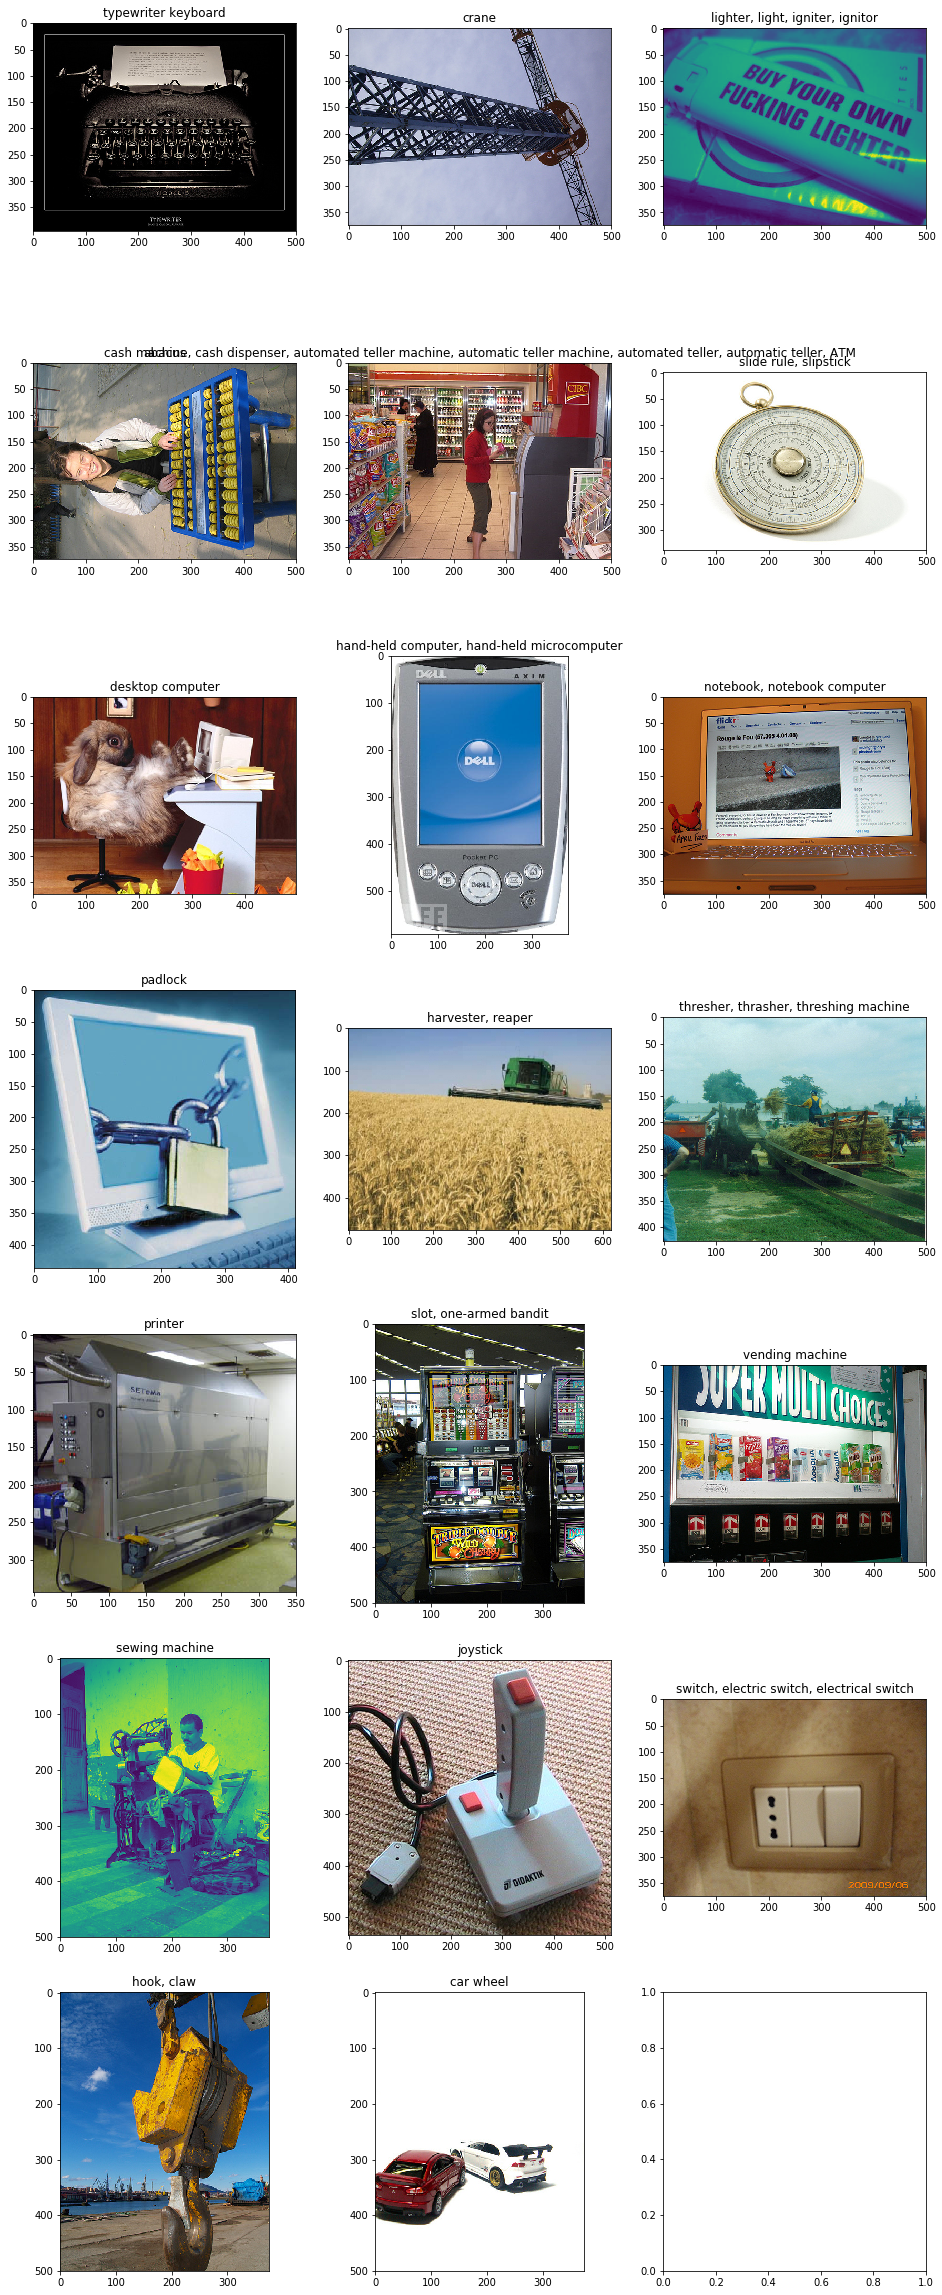

In [201]:
images_per_synset = 1
num_synsets = 20
root_path = "/home/ubuntu/github/ai/recycle/data/ILSVRC2012_val/"

start_synset = 100
num_images = num_synsets * images_per_synset
ncols = 3
nrows = num_images // ncols + 1
fig, axs = plt.subplots(nrows, ncols,
                        figsize=(16, 6 * nrows), squeeze=False)
j = 0
for wnid in item_ids[start_synset: start_synset + num_synsets]:
    iid = wnid_to_id[wnid]
    sample_ids = [i for i, v in enumerate(val_groundtruth) if v == iid]
    
    for ids in sample_ids[:images_per_synset]:
        filepath = os.path.join(root_path, "ILSVRC2012_val_{:08d}.JPEG".format(ids))
        print(filepath)
        img = plt.imread(filepath)
        axs[j // ncols][j % ncols].imshow(img)
        axs[j // ncols][j % ncols].set_title(wnid_to_name[wnid])
        j += 1
    

In [202]:
wnid_to_name["n02977058"]

'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM'

In [206]:
# Save all negative filenames
negative_filepath = "../resources/negative_images.csv"
with open(negative_filepath, "wt") as f:
    f.writelines(["image,label,wnid,ilsvrc_id\n"])
    for image_id in range(50000):
        wnid = id_to_wnid[val_groundtruth[image_id]]
        if wnid in item_ids:
            f.writelines(["ILSVRC2012_val_{:08d}.JPEG,ILSVRC2012_val_{:08d}.xml,{},{}\n".format(
                image_id, image_id, wnid, val_groundtruth[image_id])])